# Fashion-Mnist CNN Classifier

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. https://www.tensorflow.org/datasets/catalog/fashion_mnist

In this notebook we create a ConvNN to classify the clothes! hooray!  
The values are between 0 and 255, *we will normalize them to be between -1 and 1.*

In [1]:
import tensorflow as tf

2025-11-26 02:26:55.200608: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-26 02:26:55.305003: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-26 02:26:58.509671: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data

In [4]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [5]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [6]:
# Define the labels. In the Fashion-MNIST dataset, there are 10 classes of clothing items from 0 to 9. (we use sparse labels)
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels)

[9 0 0 ... 3 0 5]


In [7]:
# Rescale the image values so that they lie in between -1 and 1.
train_images = (train_images / 255 * 2) - 1
test_images = (test_images / 255 * 2) - 1

In [8]:
cmap = plt.colormaps.get_cmap('berlin_r')
norm = plt.Normalize(vmin=-1, vmax=1)

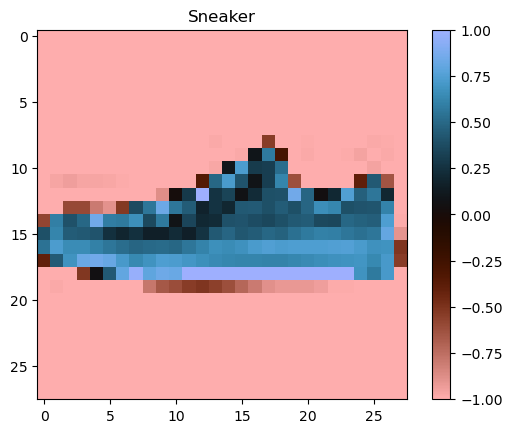

In [9]:
# Visualize it
random_inx = np.random.choice(train_images.shape[0])

image = train_images[random_inx]

plt.imshow(image, cmap=cmap, norm=norm)
plt.title(labels[train_labels[random_inx]])
plt.colorbar()
plt.show()

# Create a Secuential CNN

In [10]:
# Build the Sequential convolutional neural network model
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

/home/nvidia/miniforge3/envs/rapids-25.10-cuda12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764145623.208873   37117 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,410 (40.66 KB)

 Trainable params: 10,410 (40.66 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=[acc]
    )

# Fit the model

In [12]:
print(f'Remember that in the input shape, the last dimension is the number of channels.\nHere we have grayscale images, so the number of channels is 1,\nand we need to add a new axis to the training and test images accordingly.\n\n',
      f'So the shape of train_images changes from \n{train_images.shape} \nto \n{train_images[..., np.newaxis].shape}.')

Remember that in the input shape, the last dimension is the number of channels.
Here we have grayscale images, so the number of channels is 1,
and we need to add a new axis to the training and test images accordingly.

 So the shape of train_images changes from 
(60000, 28, 28) 
to 
(60000, 28, 28, 1).


In [13]:
history = model.fit(
    train_images[..., np.newaxis],
    train_labels,
    epochs=10,
    batch_size=512,
    verbose=1)

Epoch 1/10


2025-11-26 02:27:07.187254: I external/local_xla/xla/service/service.cc:163] XLA service 0x7c4d78016180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-26 02:27:07.187324: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-11-26 02:27:07.208369: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-26 02:27:07.340737: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600


 40/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3554 - loss: 2.0511

I0000 00:00:1764145629.419650   37232 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6466 - loss: 1.2215
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7858 - loss: 0.6253
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8199 - loss: 0.5188
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8365 - loss: 0.4688
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8484 - loss: 0.4364
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8552 - loss: 0.4143
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8615 - loss: 0.3975
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8661 - loss: 0.3857
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8694 - loss: 0.3748
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8723 - loss: 0.3669


## Plot training history

In [14]:
# Load the history into a pandas Datafram e
history_df = pd.DataFrame(history.history)
print(history_df.shape)
history_df.tail()

(10, 2)


,accuracy,loss
5,0.855217,0.414259
6,0.861500,0.397463
7,0.866050,0.385744
8,0.869350,0.374807
9,0.872333,0.366911


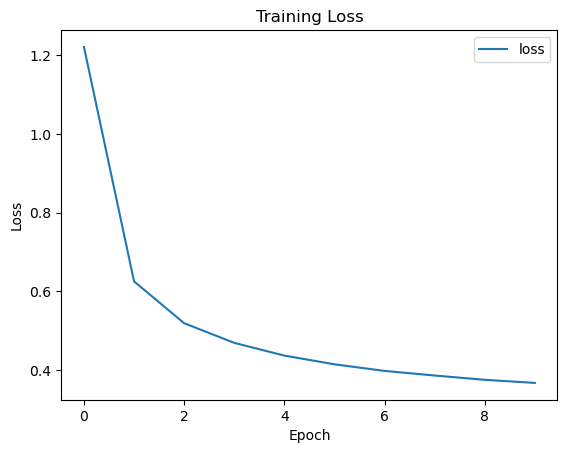

In [15]:
# Make a plot for the loss
history_df[['loss']].plot()
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

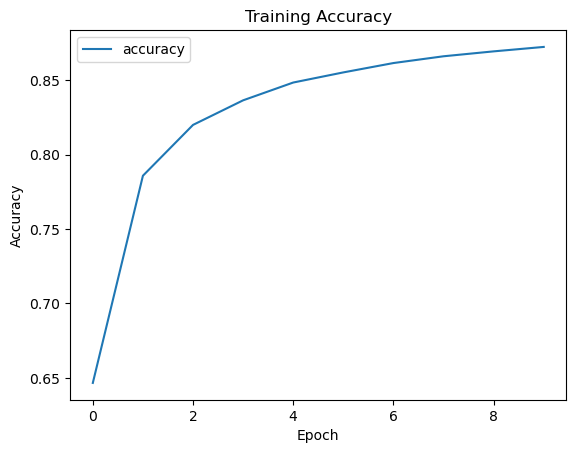

In [16]:
# Make a plot for the accuracy
history_df[['accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## View the Kernels

In [17]:
conv_layer = model.layers[0]              # or model.get_layer(index=0)
weights, biases = conv_layer.get_weights()

print("weights.shape:", weights.shape)
print("biases.shape:", biases.shape)

weights.shape: (3, 3, 1, 16)
biases.shape: (16,)


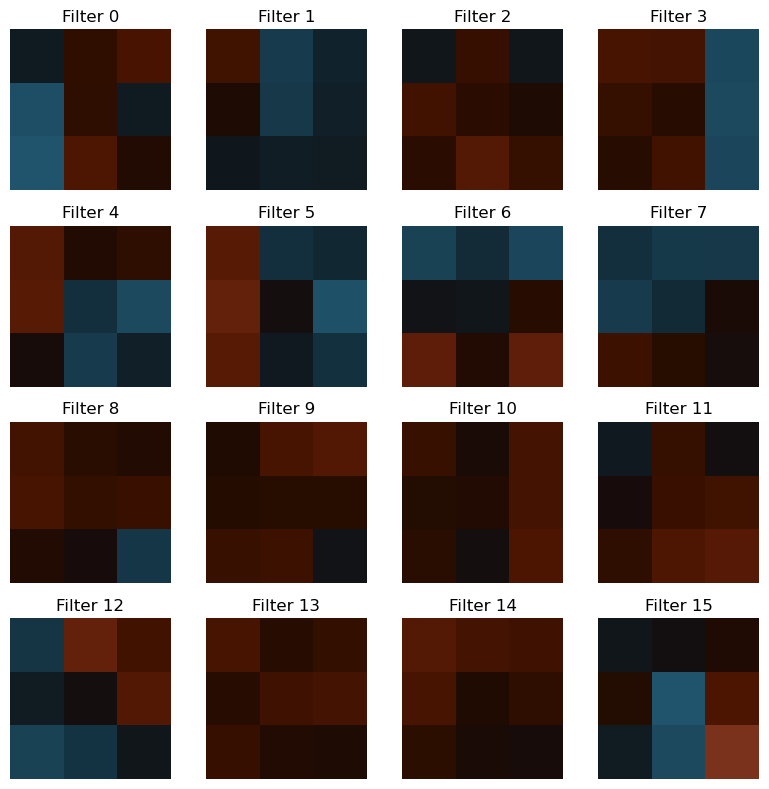

In [18]:
kernels = weights  # shape: (3, 3, 1, 16)

n_filters = kernels.shape[-1]

# Choose a grid size (e.g., 4x4 for 16 filters)
n_cols = 4
n_rows = int(np.ceil(n_filters / n_cols))

plt.figure(figsize=(8, 8))

for i in range(n_filters):
    # kernel for filter i, shape: (3, 3, 1)
    k = kernels[:, :, 0, i]   # squeeze channel dimension → (3,3)
    
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.imshow(k, interpolation='nearest', cmap=cmap, norm=norm)
    ax.set_title(f"Filter {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [19]:
print("Filter 0 weights:\n", kernels[:, :, 0, 0])
print("\nFilter 1 weights:\n", kernels[:, :, 0, 1])
print("\nFilter 5 weights:\n", kernels[:, :, 0, 5])

Filter 0 weights:
 [[ 0.12902372 -0.1617552  -0.29210022]
 [ 0.3861273  -0.14825375  0.12510997]
 [ 0.4131553  -0.3195393  -0.06897509]]

Filter 1 weights:
 [[-0.25306308  0.29772353  0.17398328]
 [-0.04646215  0.28302374  0.15775035]
 [ 0.10635795  0.14705807  0.13569434]]

Filter 5 weights:
 [[-0.36163408  0.23465547  0.1983824 ]
 [-0.4127028   0.03721325  0.39699668]
 [-0.36129338  0.12348134  0.24473941]]


## Activation maximization: “what pattern does a filter like?”

This creates a synthetic 28×28 image that makes one chosen filter fire strongly.

Optimizing filter 0
Optimizing filter 1
Optimizing filter 2
Optimizing filter 3
Optimizing filter 4
Optimizing filter 5
Optimizing filter 6
Optimizing filter 7
Optimizing filter 8
Optimizing filter 9
Optimizing filter 10
Optimizing filter 11
Optimizing filter 12
Optimizing filter 13
Optimizing filter 14
Optimizing filter 15


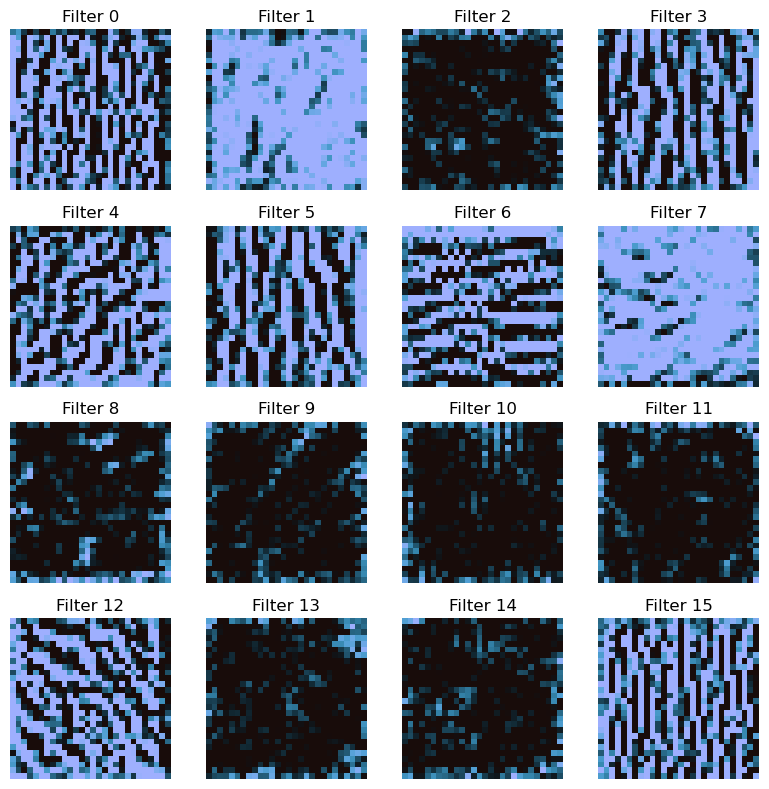

In [20]:
conv_layer = model.layers[0]           # first Conv2D layer
n_filters = conv_layer.filters         # = 16

steps = 80
step_size = 0.5

def optimize_pattern_for_filter(filter_index, steps=80, step_size=0.5):
    # Start from uniform noise in [-1, 1]
    input_img = tf.Variable(
        tf.random.uniform((1, 28, 28, 1), minval=-1.0, maxval=1.0),
        dtype=tf.float32,
    )

    for step in range(steps):
        with tf.GradientTape() as tape:
            activations = conv_layer(input_img)               # (1, H', W', 16)
            loss = tf.reduce_mean(activations[..., filter_index])

        grads = tape.gradient(loss, input_img)
        grads /= (tf.norm(grads) + 1e-8)                     # normalize
        input_img.assign_add(step_size * grads)

        # Keep the synthetic image in the same range used during training
        input_img.assign(tf.clip_by_value(input_img, -1.0, 1.0))

    # Convert to [0,1] just for display
    pattern = input_img[0, :, :, 0].numpy()
    pattern -= pattern.min()
    pattern /= (pattern.max() - pattern.min() + 1e-8)
    return pattern

# Compute patterns for all filters
patterns = []
for f in range(n_filters):
    print(f"Optimizing filter {f}")
    patterns.append(optimize_pattern_for_filter(f, steps=steps, step_size=step_size))

# Plot them in a grid
n_cols = 4
n_rows = int(np.ceil(n_filters / n_cols))

plt.figure(figsize=(8, 8))
for i, pattern in enumerate(patterns):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.imshow(pattern, cmap=cmap, norm=norm)
    ax.set_title(f"Filter {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Evaluate the model on the test set

In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8626 - loss: 0.3889


In [22]:
test_loss, test_acc

(0.38886699080467224, 0.8626000285148621)

In [23]:
# plot heatmap of confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(test_images[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


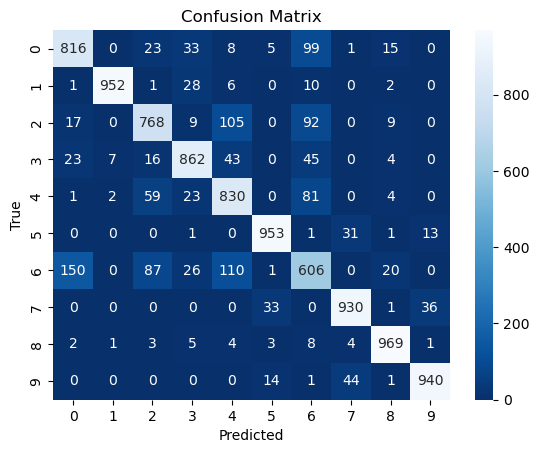

In [24]:
cm = confusion_matrix(test_labels, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report

In [25]:
# get metrics for further analysis
from sklearn.metrics import classification_report
report = classification_report(test_labels, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.77      0.78      1000
           3       0.87      0.86      0.87      1000
           4       0.75      0.83      0.79      1000
           5       0.94      0.95      0.95      1000
           6       0.64      0.61      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Make predictions from the model

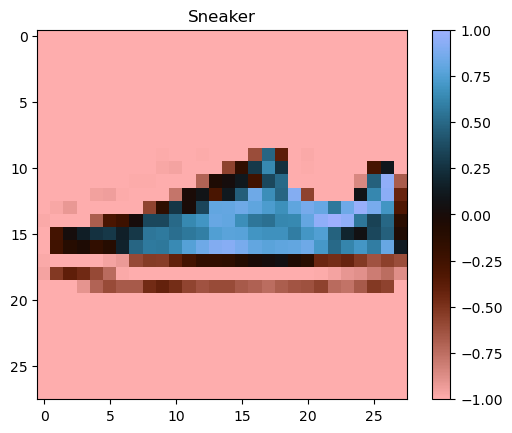

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Model predictions: Sneaker


array([[3.0993581e-06, 1.1686049e-07, 3.3865003e-06, 3.8885710e-06,
        8.8862646e-07, 6.9874298e-04, 2.3656107e-06, 9.9904591e-01,
        3.2046890e-05, 2.0957331e-04]], dtype=float32)

In [26]:
# Visualize it
random_inx = np.random.choice(test_images.shape[0])

image = test_images[random_inx]

plt.imshow(image, cmap=cmap, norm=norm)
plt.title(labels[test_labels[random_inx]])
plt.colorbar()
plt.show()

# Get the model predictions
sample = test_images[random_inx][np.newaxis, ..., np.newaxis]
predictions = model.predict(sample)
print(f'Model predictions: {labels[np.argmax(predictions)]}')
predictions

In [27]:
print(f'Remember that the X_test must have the shape of: \n(num_tests, input_size, channels).\nIn this case, we only want to predict 1 image, and we declared 1 channel,\nso we convert it from {test_images[random_inx].shape} to {test_images[random_inx][np.newaxis, ..., np.newaxis].shape}')

Remember that the X_test must have the shape of: 
(num_tests, input_size, channels).
In this case, we only want to predict 1 image, and we declared 1 channel,
so we convert it from (28, 28) to (1, 28, 28, 1)


## Visualize feature maps after MaxPooling2D for the same sample

Conv feature maps shape: (26, 26, 16)
Pooled feature maps shape: (8, 8, 16)


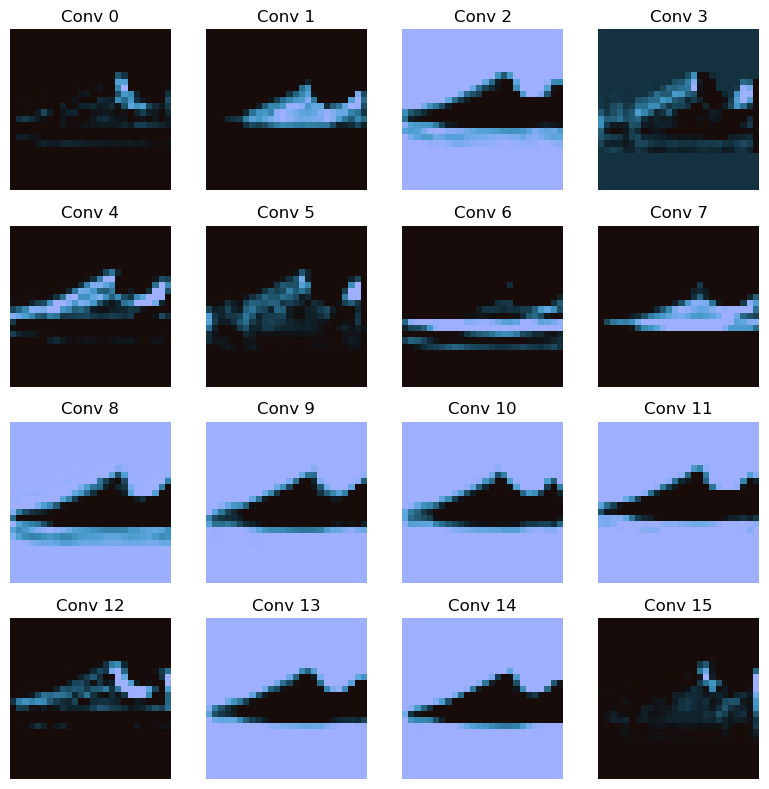

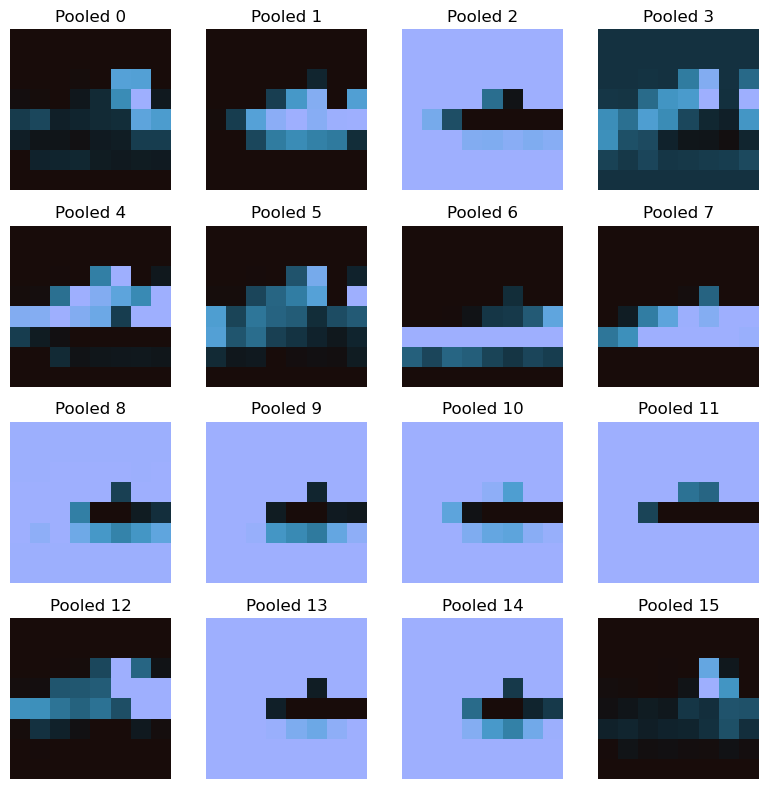

In [28]:
# First and second layers: Conv2D and MaxPooling2D
conv_layer = model.layers[0]
pool_layer = model.layers[1]

# Forward pass through Conv and then Pool
conv_output = conv_layer(sample)      # (1, H1, W1, 16)
pool_output = pool_layer(conv_output) # (1, H2, W2, 16)

conv_maps = conv_output[0].numpy()    # (H1, W1, 16)
pool_maps = pool_output[0].numpy()    # (H2, W2, 16)

print("Conv feature maps shape:", conv_maps.shape)
print("Pooled feature maps shape:", pool_maps.shape)

n_filters = conv_maps.shape[-1]
n_cols = 4
n_rows = int(np.ceil(n_filters / n_cols))

# 1) Conv feature maps
plt.figure(figsize=(8, 8))
for i in range(n_filters):
    fmap = conv_maps[:, :, i]
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.imshow(fmap, cmap=cmap, norm=norm)
    ax.set_title(f"Conv {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# 2) Pooled feature maps
plt.figure(figsize=(8, 8))
for i in range(n_filters):
    fmap = pool_maps[:, :, i]
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.imshow(fmap, cmap=cmap, norm=norm)
    ax.set_title(f"Pooled {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## Saliency map: “which pixels matter for this prediction?”

This shows the gradient of the predicted class score with respect to the input pixels.

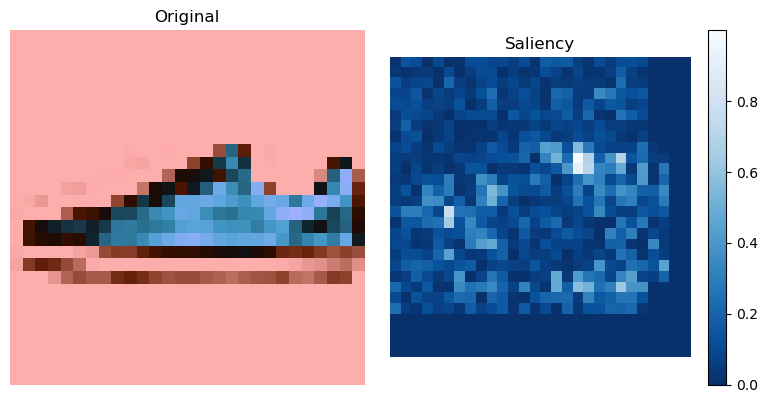

In [29]:
# Ensure sample is a Tensor with gradient tracking
x = tf.convert_to_tensor(sample, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(x)                 # track input
    preds = model(x)              # forward pass
    pred_class = tf.argmax(preds[0])
    loss = preds[:, pred_class]   # score of predicted class

# Gradient of class score w.r.t. input pixels
grads = tape.gradient(loss, x)[0]        # (28, 28, 1)

# Turn into a 2D saliency map
saliency = tf.abs(grads)
saliency = tf.reduce_max(saliency, axis=-1).numpy()  # (28, 28)

# Normalize for visualization
saliency -= saliency.min()
saliency /= (saliency.max() + 1e-8)

plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(sample[0, :, :, 0], cmap=cmap, norm=norm)
plt.title("Original")
plt.axis('off')

# Saliency map
plt.subplot(1, 2, 2)
plt.imshow(saliency, cmap='Blues_r')
plt.colorbar()
plt.title("Saliency")
plt.axis('off')

plt.tight_layout()
plt.show()
